In [22]:
from matplotlib import pyplot as plt
import numpy as np

class GameOfLife(object):  
    def __init__(self, x_dim, y_dim):
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.life_grid = [[0 for _ in range(y_dim)] for _ in range(x_dim)]
    
    def get_grid(self):
        # Implement a getter method for your grid.
        return self.life_grid

    def print_grid(self):
        # Implement a method to print out your grid in a human-readable format.
        # Prints the current state of the grid in a user-friendly format
        for row in self.life_grid:
            # Print each cell in the row with a '|' separator
            print(" | ".join(str(cell) for cell in row))
            # Print a separator line after each row
            print("-" * (self.y_dim * 4 - 1))  # Adjust width for visual alignment


    def populate_grid(self, coord):
        # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
        # Set cells specified in coord to 'alive' (1)
        for (row, col) in coord:
            if 0 <= row < self.x_dim and 0 <= col < self.y_dim:  # Ensure valid coordinates
                self.life_grid[row][col] = 1
        return self.life_grid

    def make_step(self):
        # Initialize a grid to store neighbor sums
        sum_grid = [[0 for _ in range(self.y_dim)] for _ in range(self.x_dim)]
        
        # Calculate the sum of neighbors for each cell
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                # Loop over neighboring cells
                for a in range(max(0, i - 1), min(self.x_dim, i + 2)):
                    for b in range(max(0, j - 1), min(self.y_dim, j + 2)):
                        if (a, b) != (i, j):  # Exclude the cell itself
                            sum_grid[i][j] += self.life_grid[a][b]
        
        # Update cells based on the Game of Life rules
        for i in range(self.x_dim):
            for j in range(self.y_dim):
                live_neighbors = sum_grid[i][j]
                if self.life_grid[i][j] == 1:
                    # Apply rules for live cells
                    if live_neighbors < 2 or live_neighbors > 3:
                        self.life_grid[i][j] = 0  # Cell dies
                    # Else, cell survives (2 or 3 neighbors)
                else:
                    # Apply rule for dead cells
                    if live_neighbors == 3:
                        self.life_grid[i][j] = 1  # Cell becomes alive
        
        return self.life_grid

    def make_n_steps(self, n):
        # Advance the game by n steps
        for _ in range(n):
            self.make_step()
        return self.life_grid

    def draw_grid(self):
        # Convert life_grid to a numpy array for easier masking and plotting
        grid_array = np.array(self.life_grid)

        # Prepare x and y coordinates for both alive and dead cells
        x_alive, y_alive = np.where(grid_array == 1)
        x_dead, y_dead = np.where(grid_array == 0)

        # Set up the plot
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Draw dead cells in purple and live cells in yellow
        ax.scatter(y_dead, x_dead, c='purple', s=200, marker='s', edgecolors='k')
        ax.scatter(y_alive, x_alive, c='yellow', s=200, marker='s', edgecolors='k')

        # Set limits and invert the y-axis to match the printed grid's orientation
        ax.set_xlim(-0.5, self.y_dim - 0.5)
        ax.set_ylim(-0.5, self.x_dim - 0.5)
        ax.invert_yaxis()

        # Remove axis ticks for a cleaner look
        ax.set_xticks([])
        ax.set_yticks([])

        plt.show()

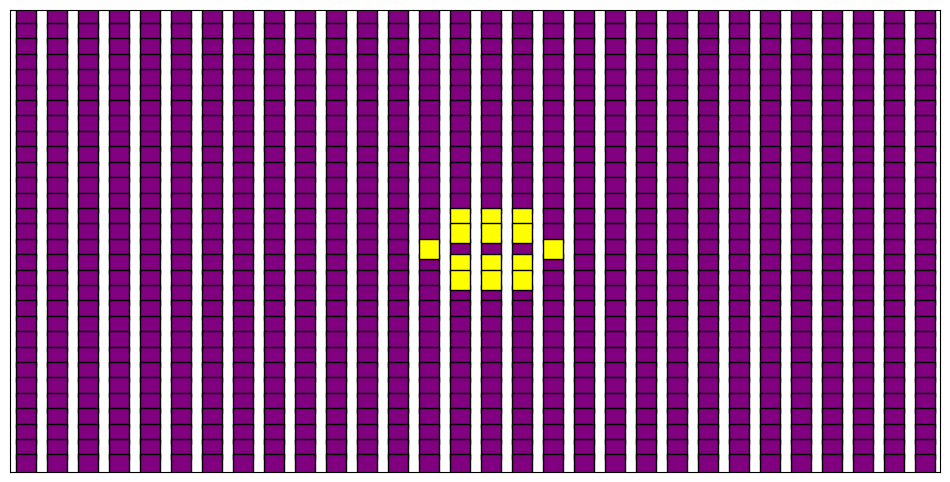

In [23]:
# Testing the make_step method
if __name__ == "__main__":
    # Create an instance of GameOfLife with a 5x5 grid
    game = GameOfLife(30, 30)
    
    # Populate the grid with an initial configuration
    initial_alive_cells = [(14, 15), (15, 15), (16, 15), (15, 14), (16, 16), (14, 16), (15, 17)]  # A simple horizontal line
    game.populate_grid(initial_alive_cells)
    
    # Make one step and print the updated grid
    # game.make_step()
    # print("\nGrid After One Step:")
    # game.print_grid()
    
    # Make a few steps and visualize the grid again
    n_steps = 3
    game.make_n_steps(n_steps)
    game.draw_grid()